In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
X = pd.read_csv("Data lat dan lon Kota palembang.csv")

In [3]:
X = X[["Latitude", "Longitude"]]
X.head()

,Latitude,Longitude
0,-2.938783,104.760288
1,-2.906790,104.692254
2,-2.934693,104.690078
3,-2.928436,104.700182
4,-2.934685,104.690082


In [4]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
    Latitude   Longitude
0 -2.938783  104.760288
1 -2.906790  104.692254
2 -2.934693  104.690078
3 -2.928436  104.700182
4 -2.934685  104.690082
The shape of X is: (101, 2)


In [5]:
# Assuming X is a DataFrame
X = pd.read_csv("Data lat dan lon Kota palembang.csv")
X = X[["Latitude", "Longitude"]]

# Drop the index and convert to a NumPy array
X_array = X.values

# Print the first five elements and the shape of X_array
print("First five elements of X_array are:\n", X_array[:5])
print('The shape of X_array is:', X_array.shape)

First five elements of X_array are:
 [[ -2.93878285 104.7602879 ]
 [ -2.90679034 104.6922536 ]
 [ -2.93469343 104.6900785 ]
 [ -2.9284363  104.7001822 ]
 [ -2.93468458 104.6900824 ]]
The shape of X_array is: (101, 2)


In [6]:
def find_closest_centroids(X, centroids):
 # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)





     ### END CODE HERE ###

    return idx

In [7]:
X = X_array
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[-2.93878285,104.7602879], [-2.90679034	,104.692254], [-2.93468458,104.6900824 ]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 1 2]


In [8]:
# compute_centroids

def compute_centroids(X, idx, K):



    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    ### START CODE HERE ###
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)




    return centroids

In [9]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[ -2.95370812 104.74593432]
 [ -2.90507496 104.70343445]
 [ -2.97638584 104.70084507]]


In [10]:

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, iteration):
            plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', label='Data Points')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
            plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='o', s=100, color='blue', alpha=0.5, label='Previous Centroids')
            plt.title(f'K-Means Clustering - Iteration {iteration}')
            plt.xlabel('Latitude')
            plt.ylabel('Longitude')
            plt.legend()
            plt.show()
        # Optionally plot progress
        if plot_progress:

            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

K-Means iteration 0/9


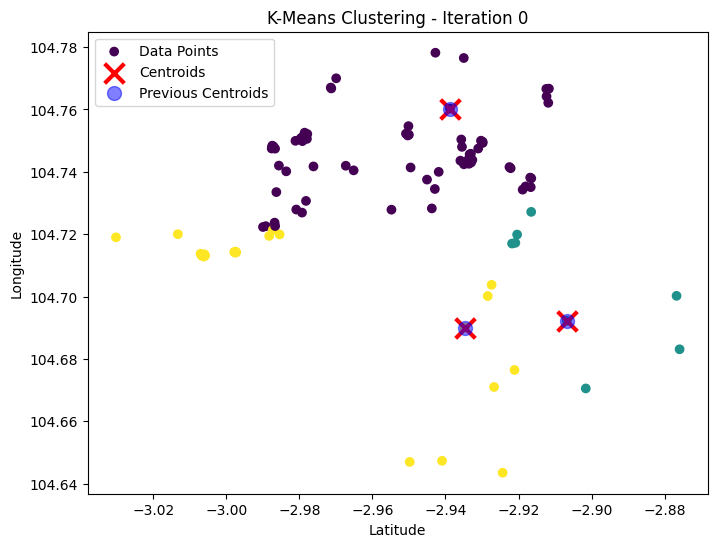

K-Means iteration 1/9


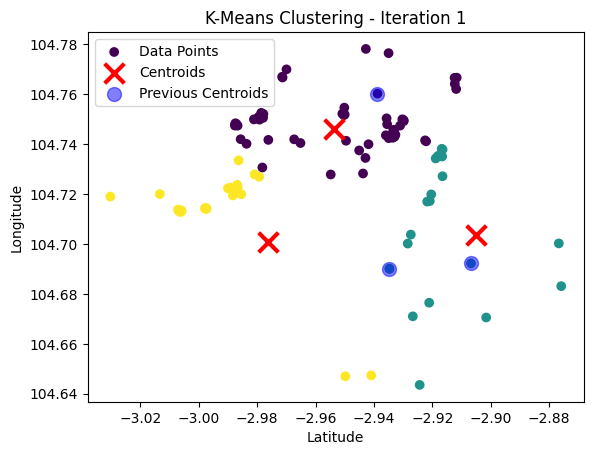

K-Means iteration 2/9


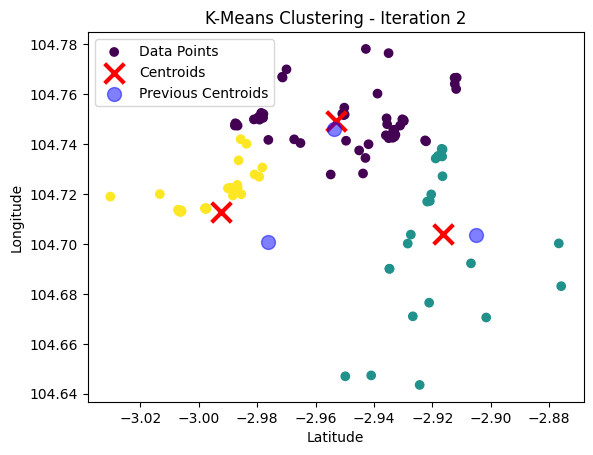

K-Means iteration 3/9


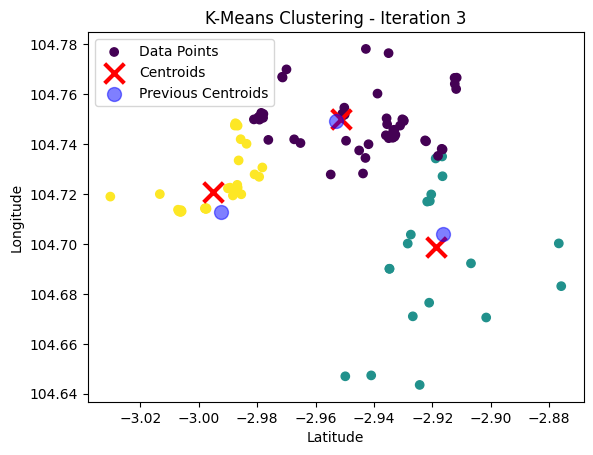

K-Means iteration 4/9


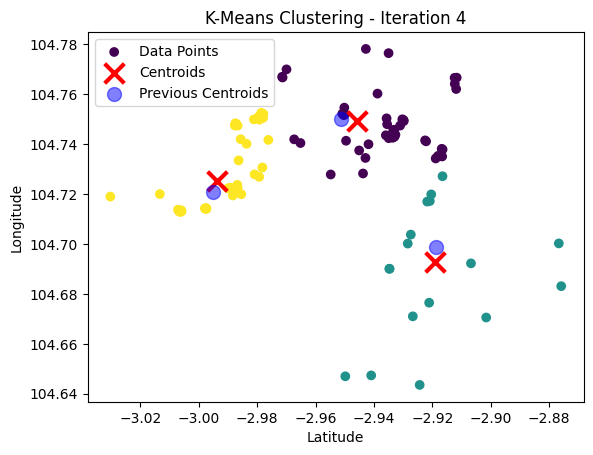

K-Means iteration 5/9


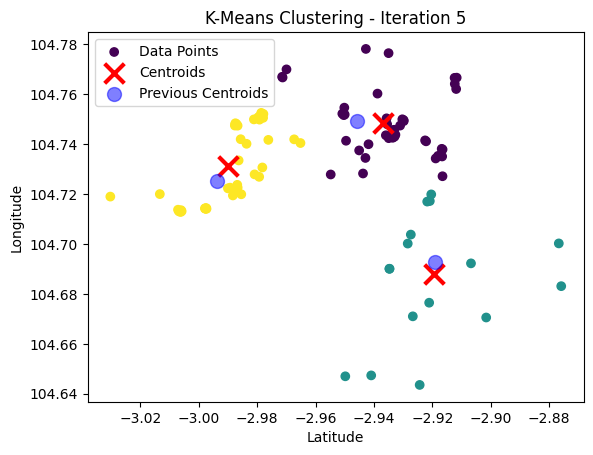

K-Means iteration 6/9


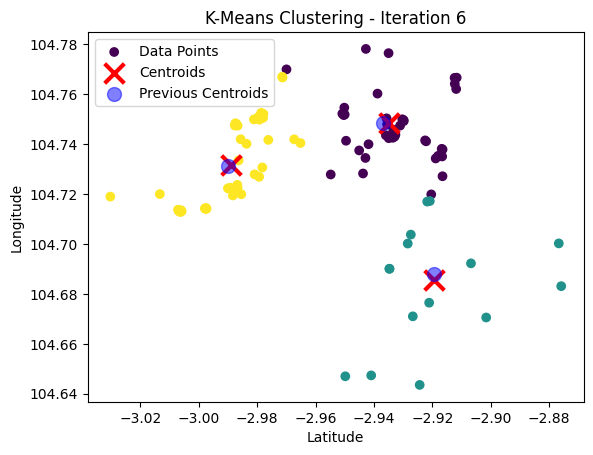

K-Means iteration 7/9


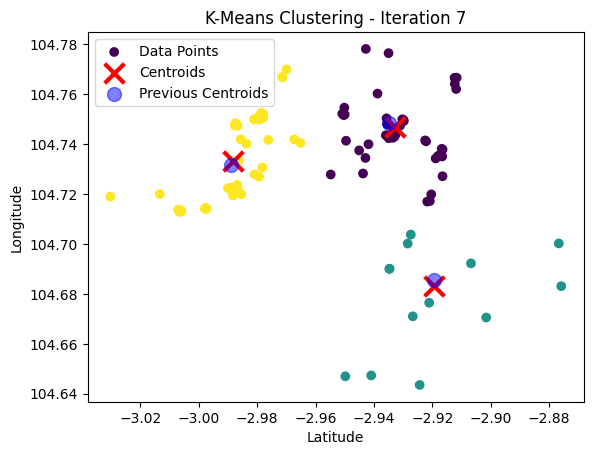

K-Means iteration 8/9


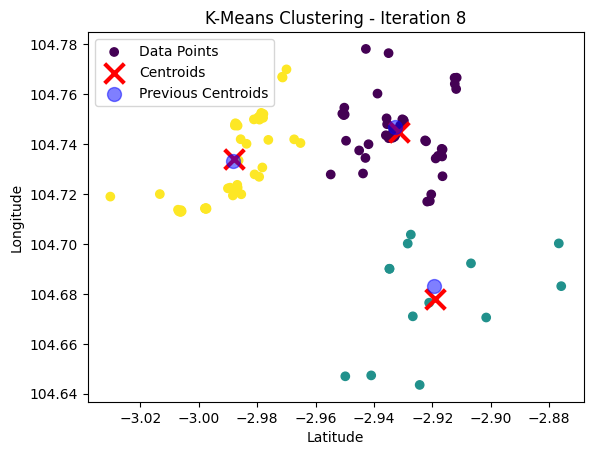

K-Means iteration 9/9


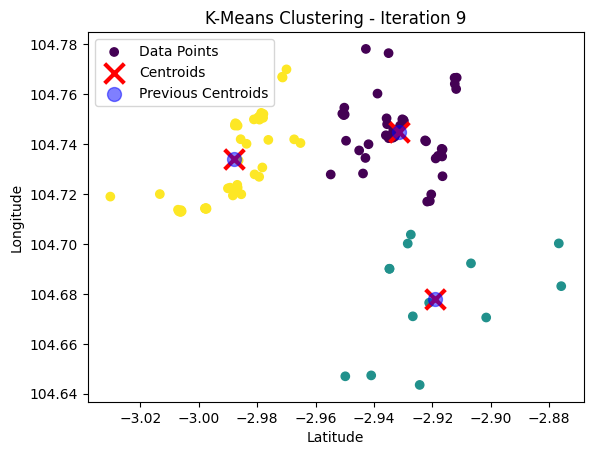

In [11]:
# Load an example dataset
X = X_array

# Set initial centroids
initial_centroids = np.array([[-2.93878285,104.7602879], [-2.90679034	,104.692254], [-2.93468458,104.6900824 ]])
# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [ ]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):


    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 0/19


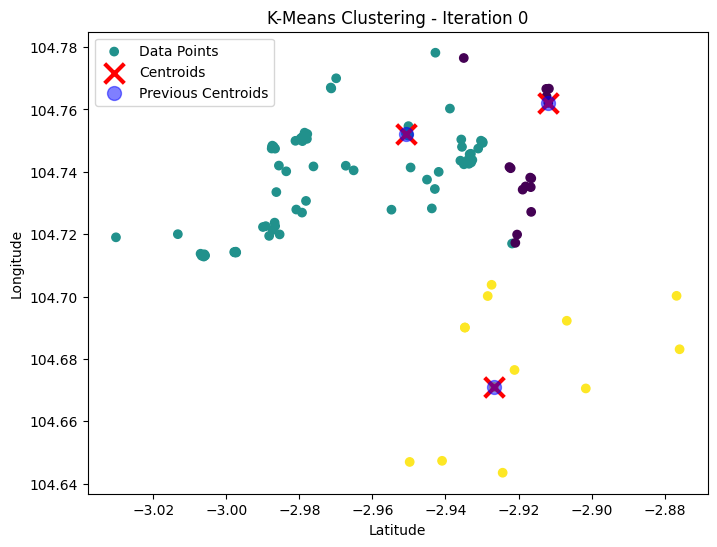

K-Means iteration 1/19


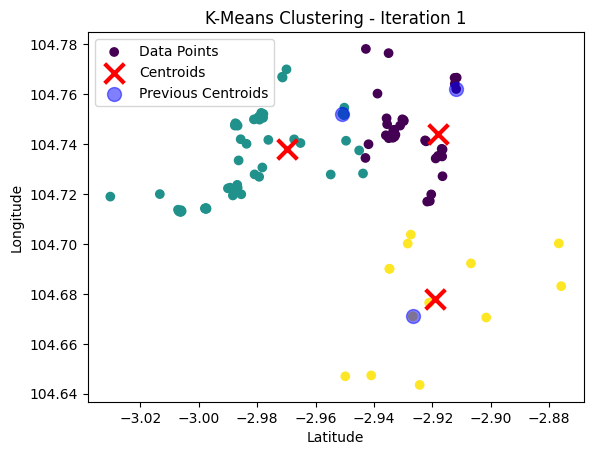

K-Means iteration 2/19


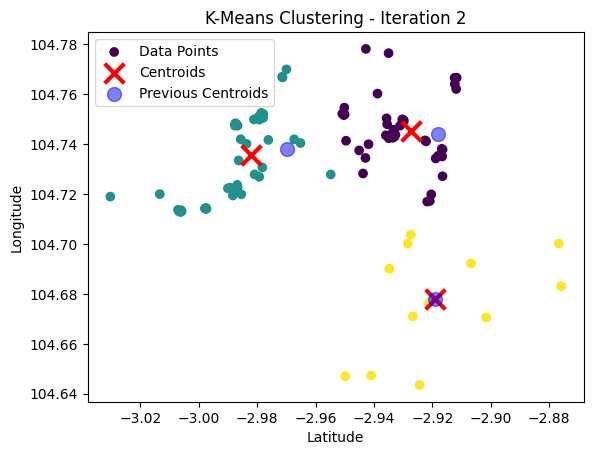

K-Means iteration 3/19


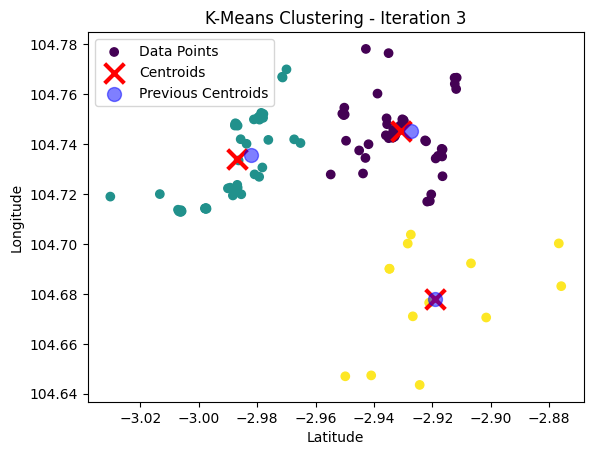

K-Means iteration 4/19


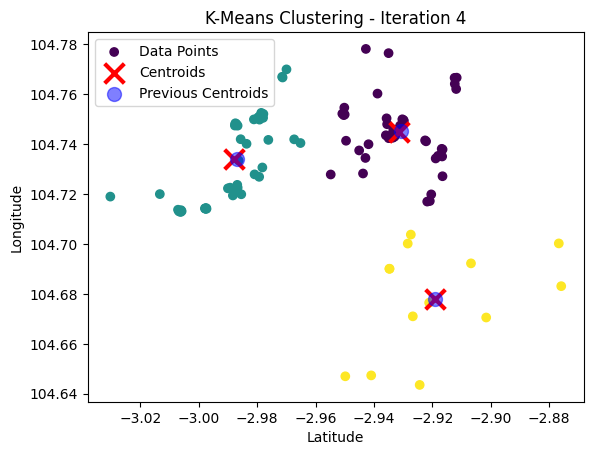

K-Means iteration 5/19


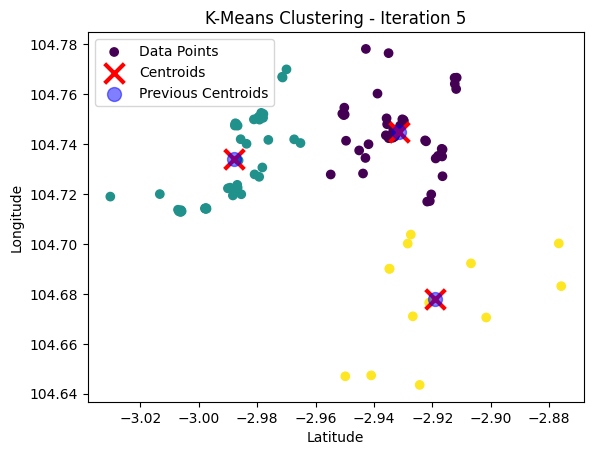

K-Means iteration 6/19


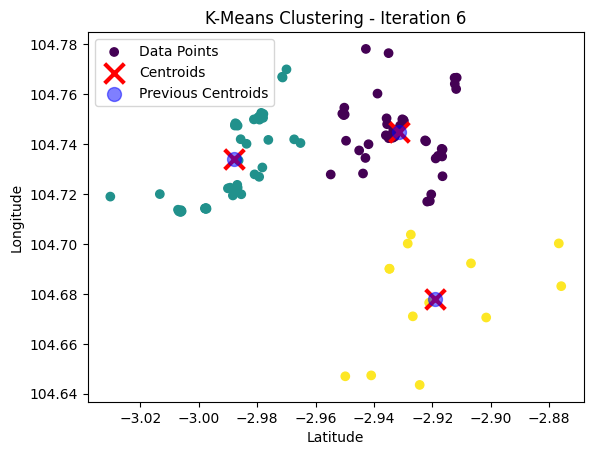

K-Means iteration 7/19


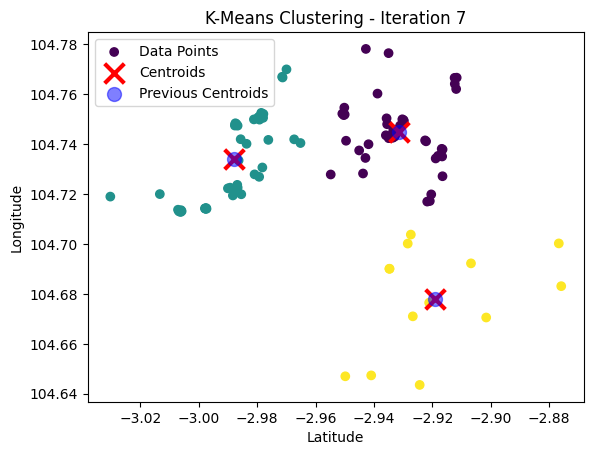

K-Means iteration 8/19


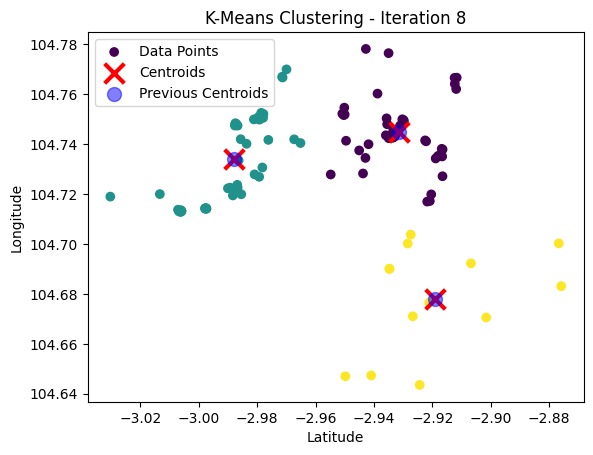

K-Means iteration 9/19


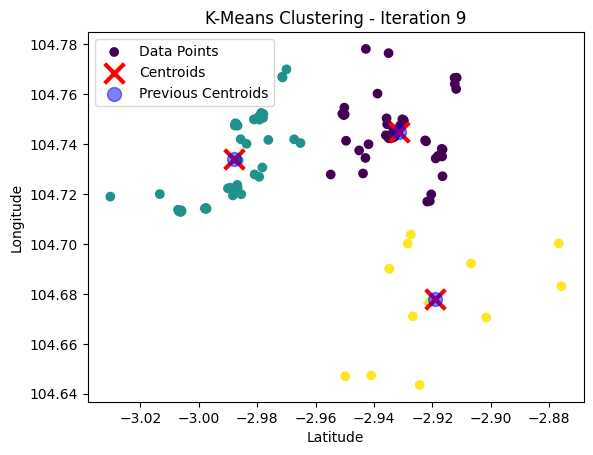

K-Means iteration 10/19


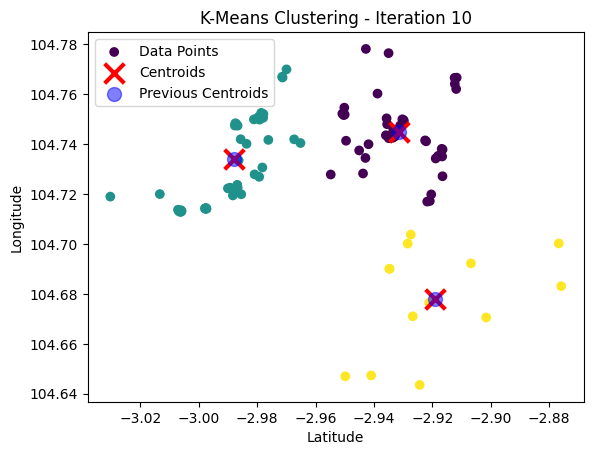

K-Means iteration 11/19


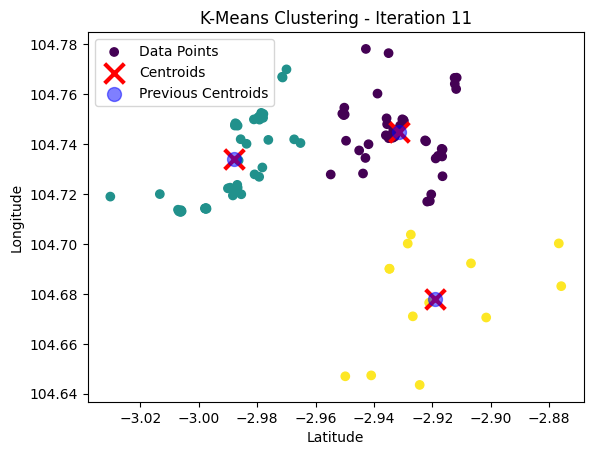

K-Means iteration 12/19


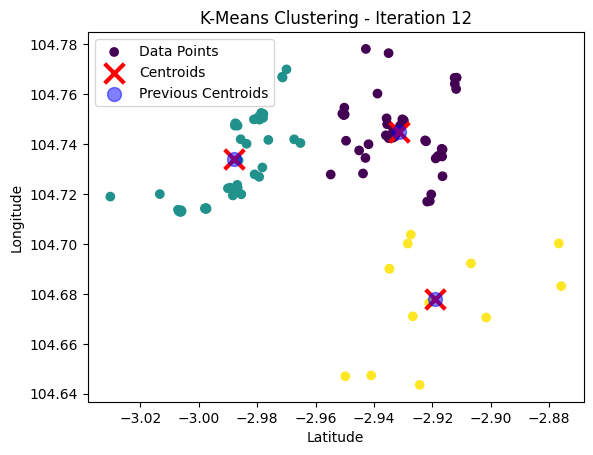

K-Means iteration 13/19


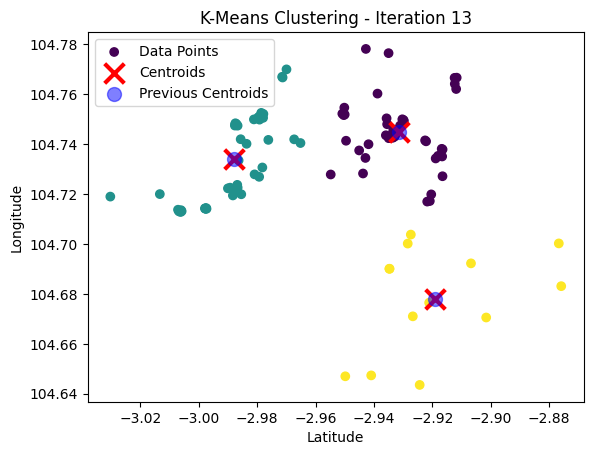

K-Means iteration 14/19


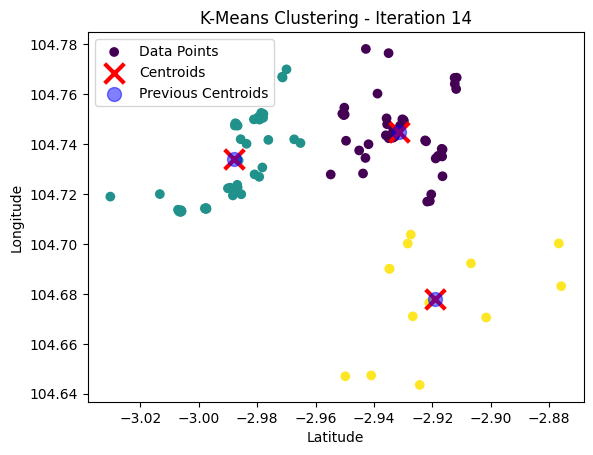

K-Means iteration 15/19


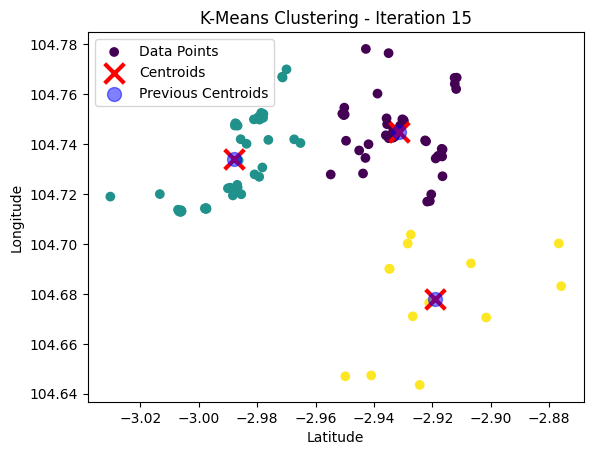

K-Means iteration 16/19


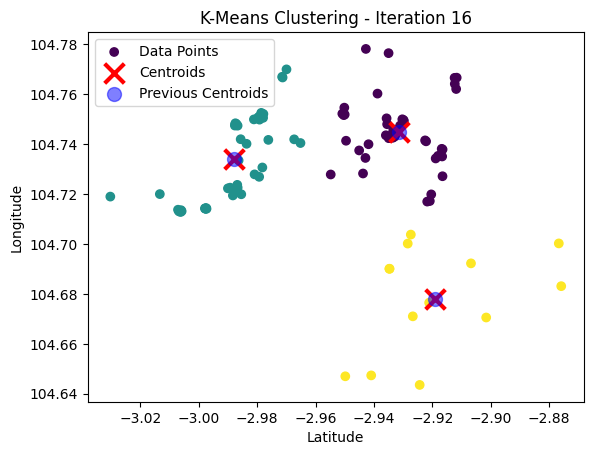

K-Means iteration 17/19


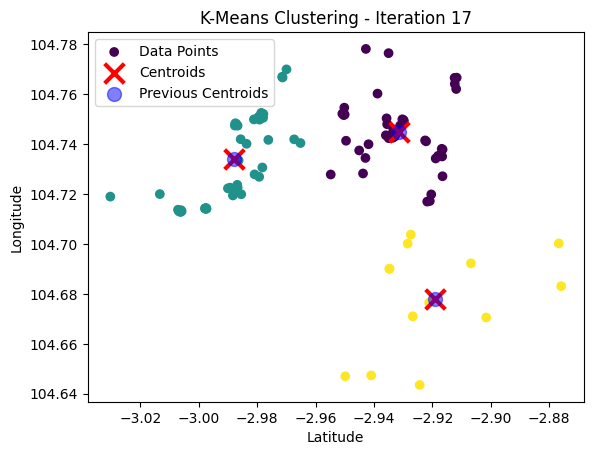

K-Means iteration 18/19


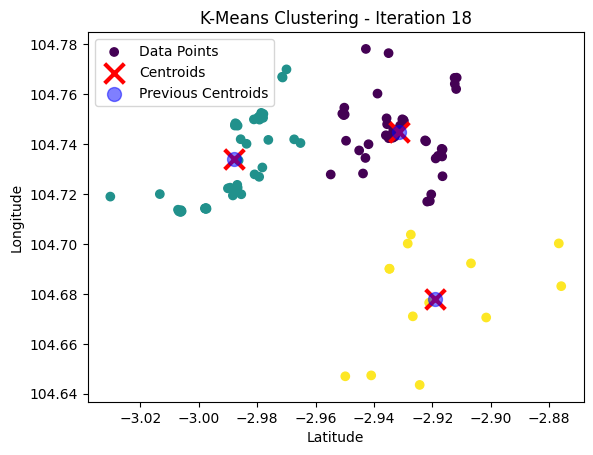

K-Means iteration 19/19


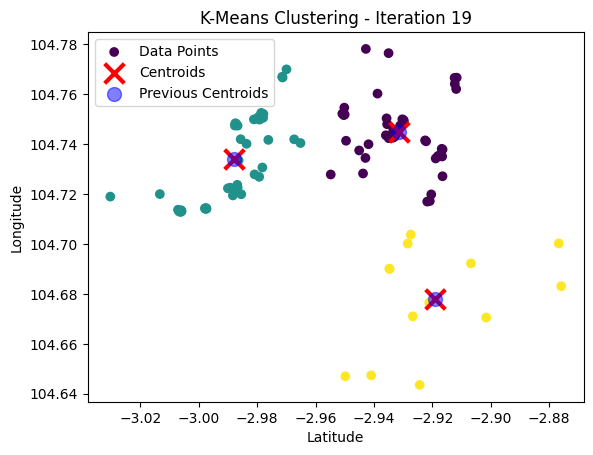

In [ ]:


# Set number of centroids and max number of iterations
K = 3
max_iters = 20

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)